<a href="https://colab.research.google.com/github/ayushh0110/Compressive_strength/blob/main/comp_strength.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import tensorflow as tf


In [ ]:
pip show scikit-learn


Name: scikit-learn
Version: 1.2.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: /usr/local/lib/python3.10/dist-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: bigframes, fastai, imbalanced-learn, librosa, mlxtend, qudida, sklearn-pandas, yellowbrick


data extraction

In [ ]:
ts=pd.read_csv('TEST SHEET 2.csv')

In [ ]:
ts.head()

,GRADE,UPV,REBOUND,AGE,STRENGTH FROM,STRENGTH TO
0,M30,3.738,30.03,3,13.00,21.00
1,M30,4.059,29.51,3,16.47,16.47
2,M30,3.533,29.41,3,9.00,17.00
3,M30,3.590,28.88,3,9.00,17.00
4,M30,3.597,29.68,3,9.00,17.00


In [ ]:
ts.shape

(213, 6)

In [ ]:
ts.info

<bound method DataFrame.info of     GRADE    UPV  REBOUND  AGE  STRENGTH FROM  STRENGTH TO
0     M30  3.738    30.03    3          13.00        21.00
1     M30  4.059    29.51    3          16.47        16.47
2     M30  3.533    29.41    3           9.00        17.00
3     M30  3.590    28.88    3           9.00        17.00
4     M30  3.597    29.68    3           9.00        17.00
..    ...    ...      ...  ...            ...          ...
208   M25  3.800    41.35    0          23.00        27.00
209   M30  3.881    39.86    0          22.00        30.00
210   M30  3.999    44.33    0          24.00        32.00
211   M30  4.060    48.18    0          41.89        41.89
212   M30  4.032    43.54    0          27.00        35.00

[213 rows x 6 columns]>

In [ ]:
print(ts.GRADE.value_counts())

GRADE
M30    134
M35     53
M25     26
Name: count, dtype: int64


data cleaning

In [ ]:
ts.replace({'AGE':{'UNKNOWN':-1}},inplace=True)


In [ ]:
ts.head()

,GRADE,UPV,REBOUND,AGE,STRENGTH FROM,STRENGTH TO
0,M30,3.738,30.03,3,13.00,21.00
1,M30,4.059,29.51,3,16.47,16.47
2,M30,3.533,29.41,3,9.00,17.00
3,M30,3.590,28.88,3,9.00,17.00
4,M30,3.597,29.68,3,9.00,17.00


In [ ]:
ts.replace({'GRADE':{'M25':25,'M30':30,'M35':35}},inplace=True)

In [ ]:
ts.head()

,GRADE,UPV,REBOUND,AGE,STRENGTH FROM,STRENGTH TO
0,30,3.738,30.03,3,13.00,21.00
1,30,4.059,29.51,3,16.47,16.47
2,30,3.533,29.41,3,9.00,17.00
3,30,3.590,28.88,3,9.00,17.00
4,30,3.597,29.68,3,9.00,17.00


In [ ]:
X = ts.drop(['STRENGTH FROM','STRENGTH TO'],axis=1)

Y = ts['STRENGTH FROM']

Z = ts['STRENGTH TO']

In [ ]:
print(X)

     GRADE    UPV  REBOUND  AGE
0       30  3.738    30.03    3
1       30  4.059    29.51    3
2       30  3.533    29.41    3
3       30  3.590    28.88    3
4       30  3.597    29.68    3
..     ...    ...      ...  ...
208     25  3.800    41.35    0
209     30  3.881    39.86    0
210     30  3.999    44.33    0
211     30  4.060    48.18    0
212     30  4.032    43.54    0

[213 rows x 4 columns]


In [ ]:
print(Y)

0      13.00
1      16.47
2       9.00
3       9.00
4       9.00
       ...  
208    23.00
209    22.00
210    24.00
211    41.89
212    27.00
Name: STRENGTH FROM, Length: 213, dtype: float64


training model

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=2)

# New Section

lasso regression


random forest

In [ ]:
rfg=RandomForestRegressor()


In [ ]:
rfg.fit(X_train,Y_train)

RandomForestRegressor()

In [ ]:
FDB=rfg.predict(X_test)

In [ ]:
errorscore=metrics.r2_score(Y_test,FDB)
print("R squared error:", errorscore)

R squared error: 0.6555021386695921


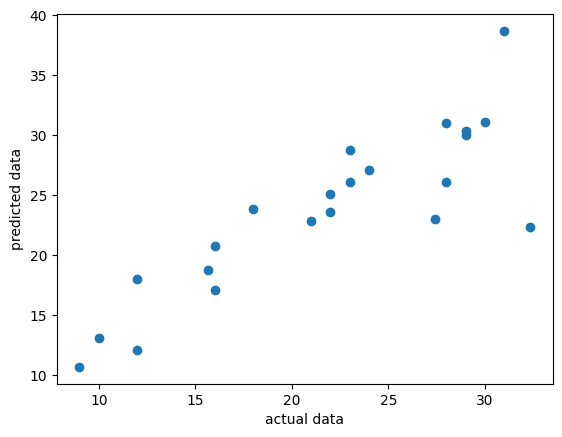

In [ ]:
plt.scatter(Y_test,FDB)
plt.xlabel("actual data")
plt.ylabel("predicted data")
plt.show()

In [ ]:
X_train, X_test, Z_train, Z_test = train_test_split(X, Z, test_size = 0.1, random_state=2)

In [ ]:
rfg1=RandomForestRegressor()
rfg1.fit(X_train,Z_train)
FDB22=rfg1.predict(X_test)

In [ ]:
errorscore=metrics.r2_score(Z_test,FDB22)
print("R squared error:", errorscore)

R squared error: 0.8334470816045089


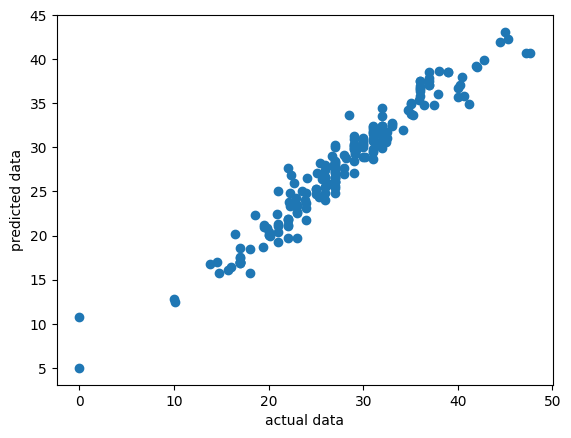

In [ ]:
FDB2=rfg1.predict(X_train)
plt.scatter(Z_train,FDB2)
plt.xlabel("actual data")
plt.ylabel("predicted data")
plt.show()

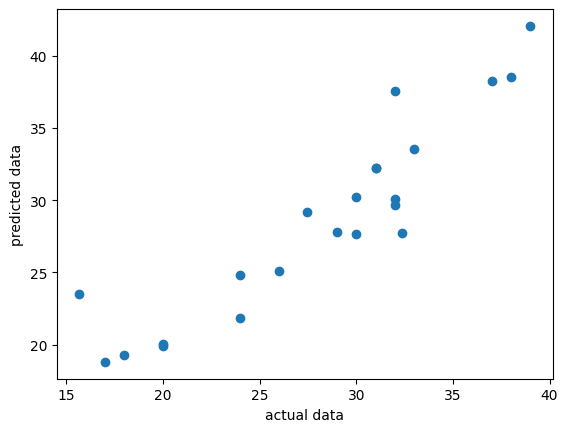

In [ ]:
plt.scatter(Z_test,FDB22)
plt.xlabel("actual data")
plt.ylabel("predicted data")
plt.show()

In [ ]:
import pickle
pickle.dump(rfg,open('model.pkl','wb'))

In [ ]:
pickle.dump(rfg1,open('model1.pkl','wb'))

In [ ]:
def make_prediction(grade,upv, rebound, age):
    input_query_from =  np.array([[grade,upv,rebound,age]])
    result_from = rfg.predict(input_query_from)[0]
    result_to = rfg1.predict(input_query_from)[0]
    return result_from,result_to

In [ ]:

grade = input("Enter grade: ")
upv = input("Enter your upv: ")
rebound = input("Enter your rebound: ")
age = input("Enter your age: ")
make_prediction(grade,upv,rebound,age)

Enter grade: 30
Enter your upv: 3.7
Enter your rebound: 20
Enter your age: 3


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


(10.1899, 16.8164)